## Домашнее задание 1.

Выполнила Аделина Макарова, группа 223.

#### Импорт и загрузка модулей

In [1]:
import nltk

In [2]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [3]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [4]:
from nltk.corpus import wordnet as wn

In [67]:
# Проверка работы мультилингвальгого ворднета
synset = wn.synset('search.v.01')
french_lemmas = synset.lemmas('fra')
print(f"проверка: {[lemma.name() for lemma in french_lemmas]}")

проверка: ['chercher', 'rechercher']


### Шаг 1


In [6]:
# Достаем синсет
synset = wn.synset('search.v.01')

In [7]:
languages = wn.langs()    # Достаем список языков

# Проходимся по списку и создаем словарь структуры: язык: [лемма1, лемма 2...]
lemma_dic = {}
for l in languages:
  lemmas = synset.lemmas(l)
  if lemmas:
    lemma_dic[l] = lemmas

/usr/local/lib/python3.10/dist-packages/nltk/corpus/reader/wordnet.py:1564: UserWarning: No WordNet synset found for pos=a at offset=1498548.
  warnings.warn(f"No WordNet synset found for pos={pos} at offset={offset}.")
/usr/local/lib/python3.10/dist-packages/nltk/corpus/reader/wordnet.py:1564: UserWarning: No WordNet synset found for pos=a at offset=1505508.
  warnings.warn(f"No WordNet synset found for pos={pos} at offset={offset}.")
/usr/local/lib/python3.10/dist-packages/nltk/corpus/reader/wordnet.py:1564: UserWarning: No WordNet synset found for pos=a at offset=2002046.
  warnings.warn(f"No WordNet synset found for pos={pos} at offset={offset}.")
/usr/local/lib/python3.10/dist-packages/nltk/corpus/reader/wordnet.py:1564: UserWarning: No WordNet synset found for pos=a at offset=2917945.
  warnings.warn(f"No WordNet synset found for pos={pos} at offset={offset}.")


Получился словарь с леммами для каждого языка из взятого синсета

In [8]:
print(lemma_dic)

{'eng': [Lemma('search.v.01.search'), Lemma('search.v.01.seek'), Lemma('search.v.01.look_for')], 'als': [Lemma('search.v.01.gjurmim'), Lemma('search.v.01.kërkim'), Lemma('search.v.01.kërkoj')], 'arb': [Lemma('search.v.01.استشار'), Lemma('search.v.01.استكشف'), Lemma('search.v.01.اكتشف'), Lemma('search.v.01.بحث'), Lemma('search.v.01.بحث_في'), Lemma('search.v.01.تقصى'), Lemma('search.v.01.حاول'), Lemma('search.v.01.حاول_إيجاد'), Lemma('search.v.01.سبر'), Lemma('search.v.01.سعى_لعمل_شئ'), Lemma('search.v.01.طلب'), Lemma('search.v.01.طمح_في'), Lemma('search.v.01.فتش'), Lemma('search.v.01.فحص'), Lemma('search.v.01.قصد')], 'bul': [Lemma('search.v.01.търся')], 'cmn': [Lemma('search.v.01.寻找'), Lemma('search.v.01.寻觅'), Lemma('search.v.01.找'), Lemma('search.v.01.找寻'), Lemma('search.v.01.搜寻'), Lemma('search.v.01.搜查'), Lemma('search.v.01.搜索')], 'dan': [Lemma('search.v.01.lede'), Lemma('search.v.01.søge')], 'ell': [Lemma('search.v.01.ψάχνω')], 'fin': [Lemma('search.v.01.etsiä')], 'fra': [Lemma('sear

### Шаг 2

In [9]:
synset_dic = {}

# Проходимся по словарю, для каждой леммы вытаскиваем список всех синсетов
for lang, lemma_list in lemma_dic.items():
  for lemma in lemma_list:
    all_syns = wn.synsets(lemma.name(), lang = lang)

    # Добавляем в новый словарь лемма: [синсет1, синсет2]
    synset_dic[lemma.name()] = all_syns

In [71]:
# print(synset_dic)

In [12]:
# Создаем счетчик для синсетов
count_synsets = {}

# Считаем сколько раз каждый синсет встречается в предыдущем словаре
# и добавляем в ее один словарь данные
for synsets in synset_dic.values():
  for syn in synsets:
    if syn not in count_synsets.keys():
      count_synsets[syn] = 1
    else:
      count_synsets[syn] += 1

In [13]:
print(count_synsets)

{Synset('search.n.01'): 5, Synset('search.n.02'): 7, Synset('search.n.03'): 3, Synset('search.n.04'): 2, Synset('search.n.05'): 4, Synset('search.v.01'): 89, Synset('search.v.02'): 42, Synset('research.v.02'): 17, Synset('search.v.04'): 26, Synset('seek.n.01'): 2, Synset('seek.v.01'): 15, Synset('try.v.01'): 12, Synset('seek.v.04'): 3, Synset('seek.v.05'): 5, Synset('anticipate.v.05'): 4, Synset('pursuit.n.01'): 1, Synset('investigation.n.02'): 2, Synset('research.n.01'): 1, Synset('dredge.v.02'): 6, Synset('look.v.01'): 2, Synset('question.n.01'): 1, Synset('ask.v.04'): 3, Synset('investigate.v.02'): 6, Synset('invite.v.07'): 1, Synset('comb.v.02'): 8, Synset('put_on.v.07'): 1, Synset('invite.v.01'): 3, Synset('desire.v.01'): 2, Synset('chase.v.01'): 1, Synset('refer.v.03'): 1, Synset('rede.v.02'): 1, Synset('consult.v.01'): 1, Synset('denote.v.02'): 1, Synset('refer.v.02'): 1, Synset('learn.v.01'): 1, Synset('learn.v.02'): 3, Synset('learn.v.04'): 4, Synset('memorize.v.01'): 1, Synse

In [14]:
# Добавляем в список те, что встречаются чаще трех раз.
nodes = []
for syn, count in count_synsets.items():
  if count > 3:
    nodes.append(syn)

In [15]:
# Получилось 29 будущих узлов
for node in nodes:
  print(node)

Synset('search.n.01')
Synset('search.n.02')
Synset('search.n.05')
Synset('search.v.01')
Synset('search.v.02')
Synset('research.v.02')
Synset('search.v.04')
Synset('seek.v.01')
Synset('try.v.01')
Synset('seek.v.05')
Synset('anticipate.v.05')
Synset('dredge.v.02')
Synset('investigate.v.02')
Synset('comb.v.02')
Synset('learn.v.04')
Synset('analyze.v.01')
Synset('probe.v.01')
Synset('investigate.v.01')
Synset('examine.v.02')
Synset('size_up.v.01')
Synset('inspect.v.01')
Synset('quest.v.02')
Synset('quest.v.01')
Synset('scout.v.01')
Synset('cast_about.v.01')
Synset('quest_for.v.01')
Synset('want.v.03')
Synset('grope.v.01')
Synset('scan.v.02')


### Шаг 3

In [16]:
import networkx as nx

In [17]:
language_nodes = {}

# Проходимся по синсетам и кладем в список все леммы на всех языках
# Записываем в словарь

for synset in nodes:
  language_nodes[synset] = []
  for language in languages:
    try:
      all_lemmas = synset.lemmas(language)
      if all_lemmas:
        for lemma in all_lemmas:
          language_nodes[synset].append(lemma.name())
    except KeyError:
      continue

In [70]:
# print(language_nodes)

Функция построения графа, берет на вход число общих лемм, больше которого строим ребра. (чтобы для двух графов один и тот же код не дублировать)

In [19]:
import matplotlib.pyplot as plt

In [20]:
def create_graph(number):
  name_graph = nx.Graph()

  # Рассматриваем каждую пару синсетов без повторений
  for i in range(len(nodes)):
    for j in range(i + 1, len(nodes)):
        synset_1 = nodes[i]
        synset_2 = nodes[j]

        # Получаем леммы для обоих синсетов и преобразуем в множества
        lemmas_1 = set(language_nodes[synset_1])
        lemmas_2 = set(language_nodes[synset_2])

        # Находим число общих лемм и записываем в вес ребер
        common_lemmas = lemmas_1 & lemmas_2
        weight = len(common_lemmas)

        # Если лемм больше заданного порога -- добавляем взвешенное ребро
        if weight > number:
            name_graph.add_edge(synset_1.name(), synset_2.name(), weight=weight)


  # Оформляем граф
  pos = nx.spring_layout(name_graph)
  plt.figure(figsize=(15, 15))

  # Добавляем лейблы с весом ребер
  labels = nx.get_edge_attributes(name_graph, 'weight')
  nx.draw_networkx_edge_labels(name_graph, pos, edge_labels=labels)
  nx.draw_networkx_edges(name_graph, pos, alpha=0.3, edge_color='blue')
  nx.draw_networkx_labels(name_graph, pos, font_size=10, font_weight='bold')
  plt.axis('off')
  plt.show()

  return name_graph

### Граф 1


Строим первый граф, где мы рисуем ребра, если у синсетов есть хотя бы одна общая лемма

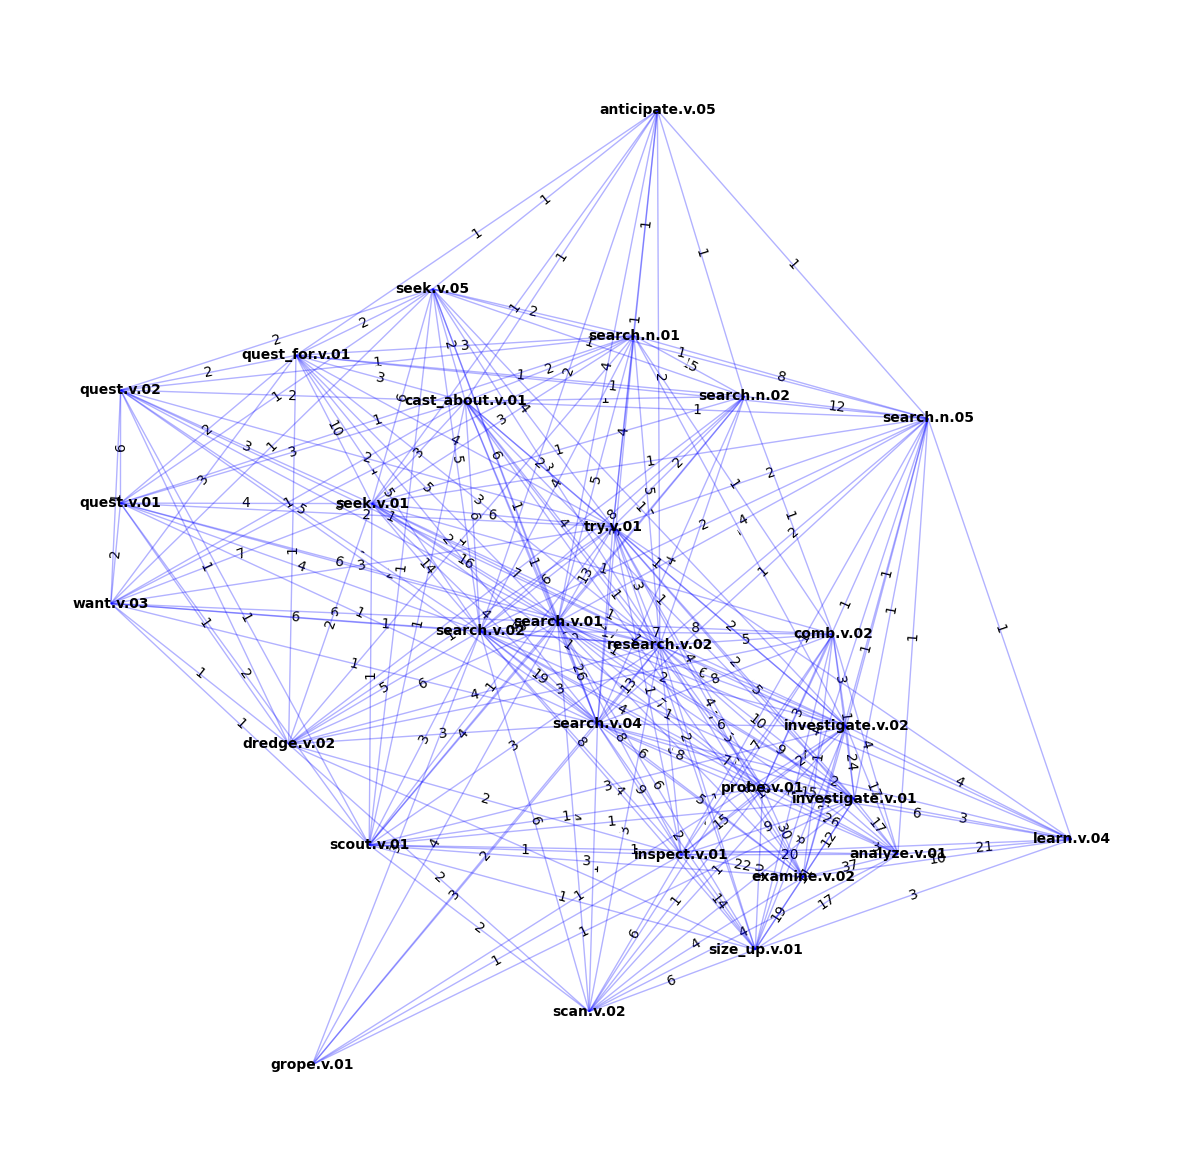

In [21]:
graph_1 = create_graph(0)

### Шаг 4

#### Анализируем граф.

У нас одна связная компонента, что видно по изображению графа: все узлы соединены друг с другом.

Рассчитали плотность. То есть отношение числа ребер к максимально возможному в графе.

In [22]:
connect_comp = nx.number_connected_components(graph_1)
print(f'Число связанных компонент: {connect_comp}')

density = nx.density(graph_1)
print(f'Плотность:{density}')

Число связанных компонент: 1
Плотность:0.645320197044335


Считаем взвешенные степени узлов

In [25]:
weighted_degrees = {}
for node, degree in graph_1.degree(weight='weight'):
    weighted_degrees[node] = degree
print(weighted_degrees)

{'search.n.01': 61, 'search.n.02': 62, 'search.n.05': 44, 'search.v.01': 240, 'search.v.02': 201, 'research.v.02': 164, 'search.v.04': 143, 'seek.v.01': 93, 'try.v.01': 82, 'seek.v.05': 40, 'anticipate.v.05': 16, 'dredge.v.02': 36, 'investigate.v.02': 140, 'comb.v.02': 58, 'quest.v.02': 33, 'quest.v.01': 37, 'cast_about.v.01': 42, 'quest_for.v.01': 48, 'want.v.03': 35, 'scout.v.01': 32, 'learn.v.04': 62, 'analyze.v.01': 195, 'probe.v.01': 164, 'investigate.v.01': 125, 'examine.v.02': 180, 'size_up.v.01': 114, 'inspect.v.01': 146, 'grope.v.01': 15, 'scan.v.02': 44}


#### Центральность узлов

Я рассмотрела метрики degree centrality, betweenness centrality и eigencentrality.

In [81]:
degree_centr = nx.degree_centrality(graph_1)
for n in sorted(degree_centr, key=degree_centr.get, reverse=True):
    print(n)

search.v.01
research.v.02
search.v.02
search.v.04
try.v.01
seek.v.01
investigate.v.02
search.n.05
cast_about.v.01
scout.v.01
investigate.v.01
search.n.01
probe.v.01
inspect.v.01
seek.v.05
examine.v.02
size_up.v.01
dredge.v.02
comb.v.02
quest_for.v.01
analyze.v.01
search.n.02
quest.v.02
quest.v.01
want.v.03
scan.v.02
learn.v.04
anticipate.v.05
grope.v.01


In [82]:
between_centr = nx.betweenness_centrality(graph_1)
for b in sorted(between_centr, key=between_centr.get, reverse=True):
    print(b)

search.v.01
research.v.02
search.v.02
search.v.04
try.v.01
investigate.v.02
scout.v.01
search.n.05
seek.v.01
cast_about.v.01
investigate.v.01
dredge.v.02
inspect.v.01
search.n.01
comb.v.02
probe.v.01
seek.v.05
size_up.v.01
search.n.02
examine.v.02
quest_for.v.01
analyze.v.01
scan.v.02
quest.v.02
quest.v.01
want.v.03
anticipate.v.05
learn.v.04
grope.v.01


In [83]:
eigencentr = nx.eigenvector_centrality(graph_1)
for e in sorted(eigencentr, key=eigencentr.get, reverse=True):
    print(e)

search.v.01
research.v.02
search.v.02
search.v.04
try.v.01
investigate.v.02
seek.v.01
search.n.05
cast_about.v.01
investigate.v.01
scout.v.01
probe.v.01
search.n.01
inspect.v.01
examine.v.02
size_up.v.01
seek.v.05
analyze.v.01
comb.v.02
quest_for.v.01
dredge.v.02
search.n.02
quest.v.02
quest.v.01
want.v.03
scan.v.02
learn.v.04
anticipate.v.05
grope.v.01


Распределение узлов немного отличается в зависимости от метрики, что объясняется методом подсчета центральности. Например, scout.v.01 ниже по метрике eigencentrality, чем по degree centrality, где просто рассчитывается степень узла.

Но по большей части, узлы не меняют важность радикально, первые пять вообще одинаковые для всех метрик.

#### Сообщества

#### Алгоритм Girvan Newman.

Разделяет граф на кластеры, удаляя ребра с наибольшим edge betweenness, то есть через которые проходит больше всего кратких путей. За одну итерацию убирается одно ребро. Таким образом формируются сообщества.

In [26]:
from networkx.algorithms import community

In [27]:
import itertools

In [34]:
# Функция для разбиения на сообщества, на вход граф и число итераций для алгоритма
def girvan_newman(graph, k):
  comp = nx.community.girvan_newman(graph)
  for communities in itertools.islice(comp, k):
    # Вывожу каждую итерацию в виде кортежа, по убыванию размера кластера
    print(tuple(sorted(c) for c in communities))

In [35]:
gn_communities_1 = girvan_newman(graph_1, 2)

(['analyze.v.01', 'anticipate.v.05', 'cast_about.v.01', 'comb.v.02', 'dredge.v.02', 'examine.v.02', 'inspect.v.01', 'investigate.v.01', 'investigate.v.02', 'learn.v.04', 'probe.v.01', 'quest.v.01', 'quest.v.02', 'quest_for.v.01', 'research.v.02', 'scan.v.02', 'scout.v.01', 'search.n.01', 'search.n.02', 'search.n.05', 'search.v.01', 'search.v.02', 'search.v.04', 'seek.v.01', 'seek.v.05', 'size_up.v.01', 'try.v.01', 'want.v.03'], ['grope.v.01'])
(['analyze.v.01', 'cast_about.v.01', 'comb.v.02', 'dredge.v.02', 'examine.v.02', 'inspect.v.01', 'investigate.v.01', 'investigate.v.02', 'learn.v.04', 'probe.v.01', 'quest.v.01', 'quest.v.02', 'quest_for.v.01', 'research.v.02', 'scan.v.02', 'scout.v.01', 'search.n.01', 'search.n.02', 'search.n.05', 'search.v.01', 'search.v.02', 'search.v.04', 'seek.v.01', 'seek.v.05', 'size_up.v.01', 'try.v.01', 'want.v.03'], ['anticipate.v.05'], ['grope.v.01'])


#### Алгоритм Louvain

Сам оценивает оптимальное количество сообществ.

In [36]:
import community as community_louvain

In [43]:
communities = nx.community.louvain_communities(graph_1)
for community in communities:
    print(community)

{'search.v.02', 'search.n.02', 'cast_about.v.01', 'anticipate.v.05', 'grope.v.01', 'dredge.v.02', 'want.v.03', 'search.n.01', 'scout.v.01', 'research.v.02', 'quest.v.02', 'seek.v.01', 'quest_for.v.01', 'search.v.01', 'comb.v.02', 'quest.v.01', 'try.v.01', 'search.v.04', 'search.n.05', 'seek.v.05'}
{'investigate.v.01', 'scan.v.02', 'investigate.v.02', 'examine.v.02', 'size_up.v.01', 'analyze.v.01', 'learn.v.04', 'inspect.v.01', 'probe.v.01'}


Тут я попробовала визуализировать результат работы этого алгоритма и выделила цветом сообщества на графе.

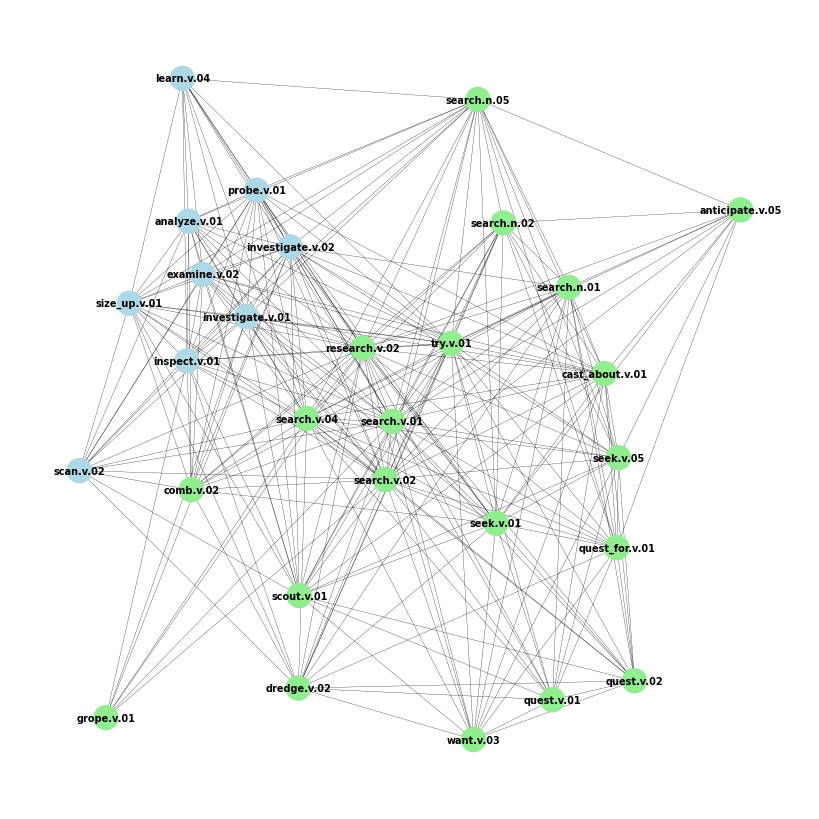

In [62]:
colors = ['lightgreen', 'lightblue']


# Словарь <сообщество: цвет для добавления параметра в граф>
node_colors = {}

# Присваиваем цвета сообществам по индексам
for i, c in enumerate(communities):
    # Записываем в словарь
    for node in c:
        node_colors[node] = colors[i]

# Визуализация
pos = nx.spring_layout(graph_1)

plt.figure(figsize=(8, 8))
nx.draw(graph_1, pos, with_labels=True, node_color=[node_colors[node] for node in graph_1.nodes()],
        node_size=300, font_size=7, font_weight="bold", width=0.2)

plt.show()

Алгоритм выделил два сообщества. Получается, в графе 2 структуры с высокой плотностью связей внутри.

Предыдущий алгоритм отделял у нашего графа по одному синсету за итерацию, и мне кажется для имеющегося графа это не очень целесообразно.

В общем, второй способ показался мне более эффективным.

### Шаг 5

Строим второй граф, где для построения ребер число общих лемм должно быть от 5.

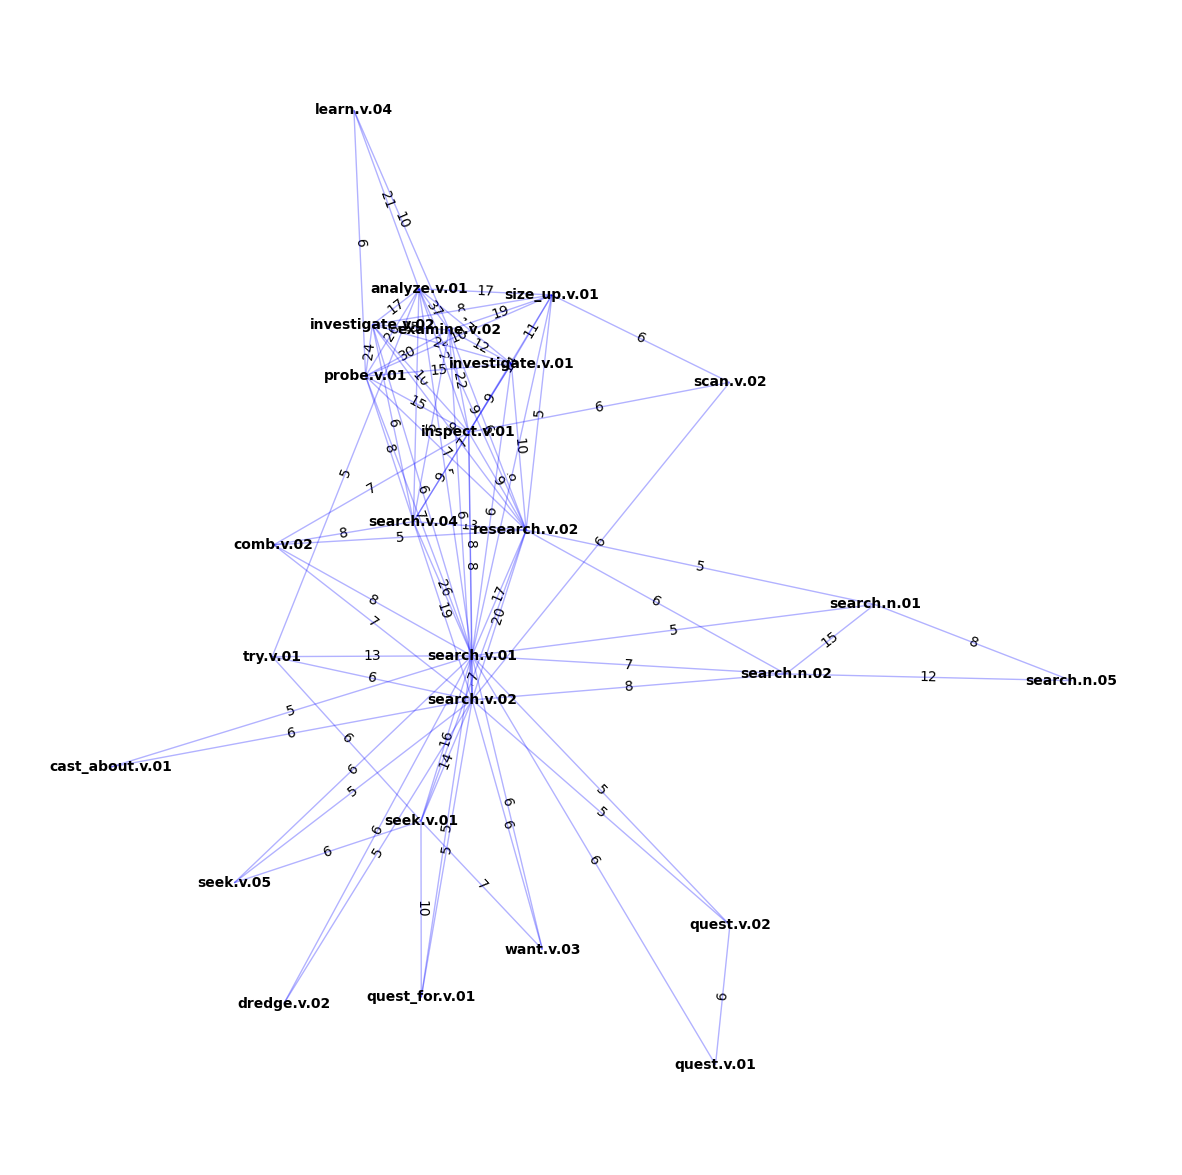

In [42]:
graph_2 = create_graph(4)

Получился граф с меньшим количеством вершин и гораздо меньшей плотностью, что логично, потому что параметр для построения ребер изменился.

In [45]:
connect_comp_2 = nx.number_connected_components(graph_2)
print(f'Число связанных компонент: {connect_comp_2}')

density_2 = nx.density(graph_2)
print(f'Плотность:{density_2}')

Число связанных компонент: 1
Плотность:0.28


In [46]:
weighted_degrees_2 = dict(graph_2.degree(weight='weight'))
print("Взвешенные степени узлов:", weighted_degrees_2)

Взвешенные степени узлов: {'search.n.01': 33, 'search.n.02': 48, 'search.n.05': 20, 'search.v.01': 212, 'research.v.02': 128, 'search.v.02': 169, 'search.v.04': 109, 'seek.v.01': 66, 'try.v.01': 30, 'seek.v.05': 17, 'dredge.v.02': 11, 'investigate.v.02': 119, 'comb.v.02': 35, 'analyze.v.01': 182, 'probe.v.01': 148, 'investigate.v.01': 111, 'size_up.v.01': 96, 'inspect.v.01': 137, 'quest.v.02': 16, 'quest.v.01': 12, 'cast_about.v.01': 11, 'quest_for.v.01': 20, 'want.v.03': 19, 'examine.v.02': 162, 'scan.v.02': 18, 'learn.v.04': 37}


In [48]:
degree_centr_2 = nx.degree_centrality(graph_2)
for n in sorted(degree_centr_2, key=degree_centr_2.get, reverse=True):
    print(n)

search.v.01
search.v.02
research.v.02
inspect.v.01
analyze.v.01
search.v.04
probe.v.01
examine.v.02
investigate.v.02
investigate.v.01
size_up.v.01
seek.v.01
search.n.02
comb.v.02
search.n.01
try.v.01
seek.v.05
quest.v.02
quest_for.v.01
want.v.03
scan.v.02
learn.v.04
search.n.05
dredge.v.02
quest.v.01
cast_about.v.01


In [50]:
between_centr_2 = nx.betweenness_centrality(graph_2)
for b in sorted(between_centr_2, key=between_centr_2.get, reverse=True):
    print(b)

search.v.01
search.v.02
research.v.02
search.n.02
analyze.v.01
search.n.01
inspect.v.01
examine.v.02
probe.v.01
size_up.v.01
seek.v.01
search.v.04
quest.v.02
try.v.01
investigate.v.02
investigate.v.01
scan.v.02
search.n.05
seek.v.05
dredge.v.02
comb.v.02
quest.v.01
cast_about.v.01
quest_for.v.01
want.v.03
learn.v.04


In [52]:
eigencentr_2 = nx.eigenvector_centrality(graph_2)
for e in sorted(eigencentr_2, key=eigencentr_2.get, reverse=True):
    print(e)

search.v.01
research.v.02
inspect.v.01
analyze.v.01
search.v.04
probe.v.01
investigate.v.02
investigate.v.01
examine.v.02
search.v.02
size_up.v.01
comb.v.02
seek.v.01
search.n.02
try.v.01
search.n.01
learn.v.04
scan.v.02
seek.v.05
quest_for.v.01
want.v.03
quest.v.02
dredge.v.02
cast_about.v.01
quest.v.01
search.n.05


Центральность узлов по разным метрикам больше отличается для этого графа. Синсеты довольно значительно перемещаются в отсортированном выводе в зависимости от метрики.

#### Сообщества

#### Алгоритм Girvan Newman.

In [54]:
gn_communities_2 = girvan_newman(graph_2, 2)

(['analyze.v.01', 'cast_about.v.01', 'comb.v.02', 'dredge.v.02', 'examine.v.02', 'inspect.v.01', 'investigate.v.01', 'investigate.v.02', 'learn.v.04', 'probe.v.01', 'quest_for.v.01', 'research.v.02', 'scan.v.02', 'search.n.01', 'search.n.02', 'search.n.05', 'search.v.01', 'search.v.02', 'search.v.04', 'seek.v.01', 'seek.v.05', 'size_up.v.01', 'try.v.01', 'want.v.03'], ['quest.v.01', 'quest.v.02'])
(['search.n.01', 'search.n.02', 'search.n.05'], ['analyze.v.01', 'cast_about.v.01', 'comb.v.02', 'dredge.v.02', 'examine.v.02', 'inspect.v.01', 'investigate.v.01', 'investigate.v.02', 'learn.v.04', 'probe.v.01', 'quest_for.v.01', 'research.v.02', 'scan.v.02', 'search.v.01', 'search.v.02', 'search.v.04', 'seek.v.01', 'seek.v.05', 'size_up.v.01', 'try.v.01', 'want.v.03'], ['quest.v.01', 'quest.v.02'])


В случае с графом 2, girvan newman смог обнаружить более крупные сообщества. В графе 1 он при том же количестве отераций отсоединял по одному синсету, тогда как в графе 2 сообщества состоят как минимум из двух.

#### Алгоритм Louvain

In [55]:
communities_2 = nx.community.louvain_communities(graph_2)
for community in communities_2:
    print(community)

{'search.n.01', 'search.n.02', 'search.n.05'}
{'investigate.v.01', 'scan.v.02', 'investigate.v.02', 'examine.v.02', 'size_up.v.01', 'analyze.v.01', 'learn.v.04', 'inspect.v.01', 'probe.v.01'}
{'research.v.02', 'cast_about.v.01', 'search.v.04', 'quest.v.02', 'want.v.03', 'seek.v.01', 'quest_for.v.01', 'search.v.01', 'quest.v.01', 'comb.v.02', 'dredge.v.02', 'try.v.01', 'search.v.02', 'seek.v.05'}


Визуализируем

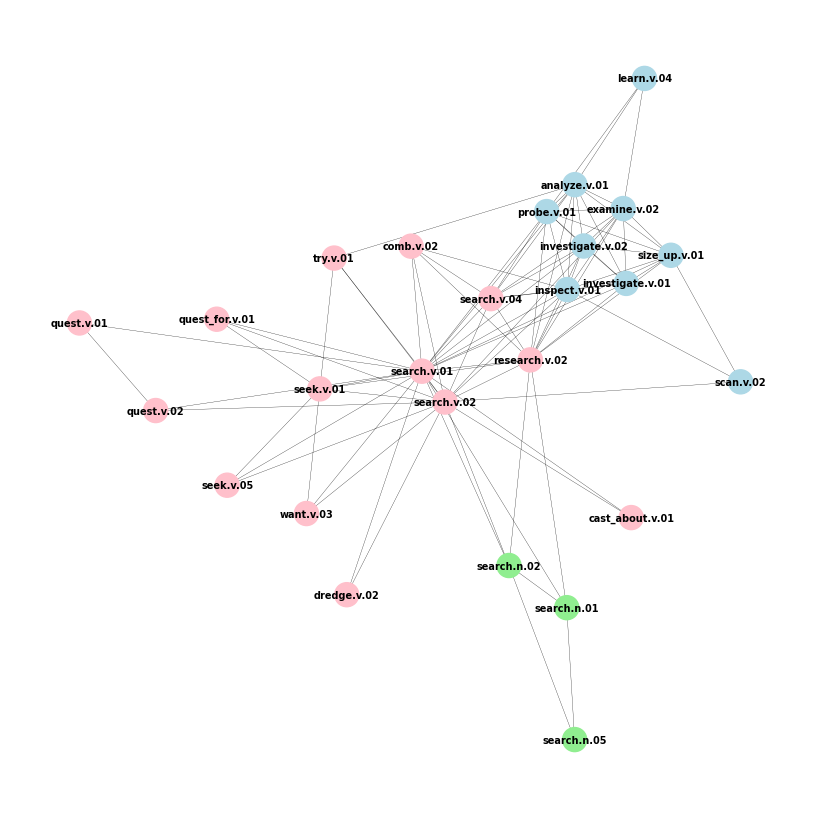

In [64]:
colors_2 = ['lightgreen', 'lightblue', 'pink']


# Словарь <сообщество: цвет для добавления параметра в граф>
node_colors_2 = {}

# Присваиваем цвета сообществам по индексам
for i, c in enumerate(communities_2):
    # Записываем в словарь
    for node in c:
        node_colors_2[node] = colors_2[i]

# Визуализация
pos = nx.spring_layout(graph_2)

plt.figure(figsize=(8, 8))

# Вставляем
nx.draw(graph_2, pos, with_labels=True, node_color=[node_colors_2[node] for node in graph_2.nodes()],
        node_size=300, font_size=7, font_weight="bold", width=0.2)

plt.show()

В этот раз алгоритм разбил граф на 3 сообщества.

Кажется, что второй граф более содержателен, так как содержит более "оправданные" связи (от 5 общих лемм).
У него ниже плотность, но как будто более явная структура. Он так же более структурно разбивается на сообщества. Оба алгоритма сработали более эффективно на втором графе.

### Шаг 7
Графы отображают, какие синсеты связаны более тесно, а какие менее, на основании того, сколько общих лемм они имеют; они позволяют оценить близость семантики синсетов. Таким образом, синсеты quest, dredge, cast about имеют меньше колексификаций с другими синсетами, чем например search, seek, investigate, что можно определить по центральности узлов, степени взвешенности.